In [1]:
import numpy as np
import matplotlib.pyplot as plt
from do_iteration import *
from scipy.integrate import solve_ivp

## Question:1

In [2]:
# Create arrays for the real and imaginary parts of c
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

# Create a meshgrid from the arrays
x, y = np.meshgrid(x, y)

# Create a complex array from the meshgrid
c = x + 1j * y

In [3]:
iteration_array = do_iteration(c, 100)

/Users/dhwanilpatel/Documents/GitHub/CTA200_2023/assignment_3/do_iteration.py:11: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/Users/dhwanilpatel/Documents/GitHub/CTA200_2023/assignment_3/do_iteration.py:11: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
/Users/dhwanilpatel/Documents/GitHub/CTA200_2023/assignment_3/do_iteration.py:14: RuntimeWarning: overflow encountered in absolute
  diverged_points = abs(z) > 2  #(for Mandelbrot set)


In [4]:
diverged_points = iteration_array > 0

color_array = np.zeros((1000, 1000, 3))

color_array[~diverged_points] = [1, 1, 1]
color_array[diverged_points] = [0, 0, 0]

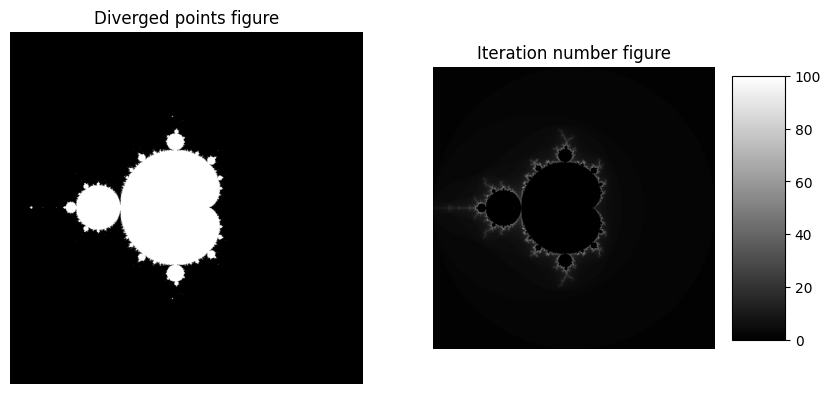

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,2)
plt.title('Iteration number figure')
plt.imshow(iteration_array, cmap='gray')
plt.axis('off')
colorbar = plt.colorbar(aspect=5)

plt.subplot(1,2,1)
plt.title('Diverged points figure')
plt.imshow(color_array)
plt.axis('off')

plt.show()

# 
# 

## Question:2 

In [6]:
from scipy.integrate import odeint

In [7]:
def solve_lorenz(time_bound, W_0, sigma, r, b):
    '''
    the function solves the set of lorenz equation given by:
    
    Lorenz equations:
    dX/dt = -sigma*(X - Y)
    dY/dt = r*X - Y - X*X
    dZ/dt = -b*Z + X*Y
    
    for the intial coniditon W_0 and parameters sigma, r, b over the time in 
    time_bound
    -------------
    Input variable:
    time_bound: array containing the bounds
    W_0: an array containing the initial X,Y,Z values
    sigma, r, b: numbers set as the parameters for the system
    '''
    X, Y, Z = W_0
    X_dot = -sigma * (X - Y)
    Y_dot = (r * X) - Y - (X * Z)
    Z_dot = -(b * Z) + (X * Y)
    
    return np.array([X_dot, Y_dot, Z_dot])

In [8]:
#defining intial conditions and parameters
W_0 = [0, 1, 0]
sigma = 10
r = 28
b = 8/3

In [10]:
time_bounds = [0, 60]
solution  = solve_ivp(solve_lorenz, time_bounds, W_0, args=(sigma, r, b))
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.990e-05 ...  5.996e+01  6.000e+01]
        y: [[ 0.000e+00  9.985e-04 ... -3.919e+00 -3.206e+00]
            [ 1.000e+00  9.999e-01 ... -1.569e+00 -2.010e+00]
            [ 0.000e+00  4.987e-08 ...  2.560e+01  2.321e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5726
     njev: 0
      nlu: 0


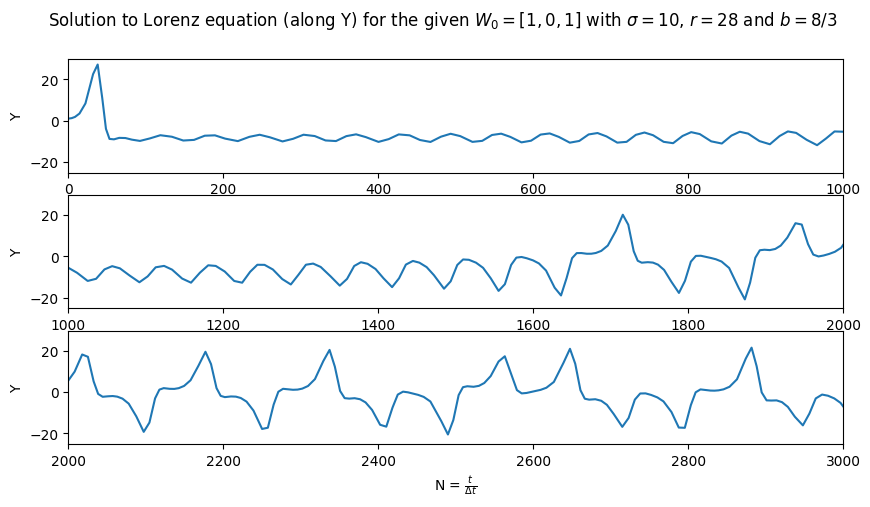

In [11]:
time = solution.t
delta_t = 0.01
N = time/delta_t

plt.figure(figsize=(10, 5))
plt.suptitle(r'Solution to Lorenz equation (along Y) for the given $W_0 = [1, 0, 1]$ with $\sigma = 10$, $r = 28$ and $b = 8/3$')

plt.subplot(3,1,1)
plt.plot(N, solution.y[1])
plt.xlabel(r'N = $\frac{t}{\Delta t}$')
plt.ylabel('Y')
plt.xlim(0, 1000)

plt.subplot(3,1,2)
plt.plot(N, solution.y[1])
plt.xlabel(r'N = $\frac{t}{\Delta t}$')
plt.ylabel('Y')
plt.xlim(1000, 2000)

plt.subplot(3,1,3)
plt.plot(N, solution.y[1])
plt.xlabel(r'N = $\frac{t}{\Delta t}$')
plt.ylabel('Y')
plt.xlim(2000, 3000)

plt.show()

In [12]:
indexes = np.where((N >= 1400) & (N <= 1900))[0]

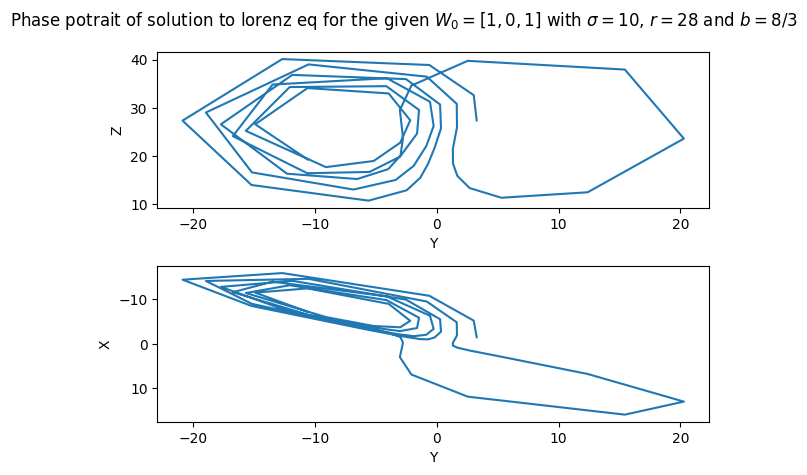

In [26]:
plt.suptitle('Phase potrait of solution to lorenz eq for the given $W_0 = [1, 0, 1]$ with $\sigma = 10$, $r = 28$ and $b = 8/3$')
plt.subplot(2,1,1)
plt.plot(solution.y[1][indexes], solution.y[2][indexes])
plt.xlabel('Y')
plt.ylabel('Z')

plt.subplot(2,1,2)
plt.plot(solution.y[1][indexes], solution.y[0][indexes])
plt.xlabel('Y')
plt.ylabel('X')
plt.gca().invert_yaxis()

plt.tight_layout()

In [14]:
# with slight change in initial condition

In [15]:
#defining intial conditions and parameters
W_0_prime = np.array([0, 1, 0]) + np.array([0, 1e-8, 0])
sigma = 10
r = 28
b = 8/3

In [17]:
time_bounds = [0, 60]
solution_prime  = solve_ivp(solve_lorenz, time_bounds, W_0_prime, args=(sigma, r, b))
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.990e-05 ...  5.996e+01  6.000e+01]
        y: [[ 0.000e+00  9.985e-04 ... -3.919e+00 -3.206e+00]
            [ 1.000e+00  9.999e-01 ... -1.569e+00 -2.010e+00]
            [ 0.000e+00  4.987e-08 ...  2.560e+01  2.321e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5726
     njev: 0
      nlu: 0


In [23]:
X_diff = np.abs(solution.y[0] - solution_prime.y[0][:-2])
Y_diff = np.abs(solution.y[1] - solution_prime.y[1][:-2])
Z_diff = np.abs(solution.y[2] - solution_prime.y[2][:-2])

W_diff = np.sqrt(X_diff ** 2 + Y_diff ** 2, Z_diff ** 2)

Text(0, 0.5, '$\\Delta W$ ')

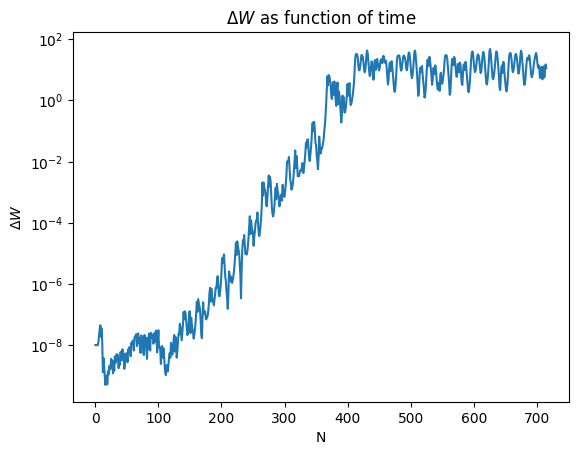

In [31]:
plt.title(r'$\Delta W $ as function of time')
plt.plot(W_diff)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel(r'$\Delta W$ ')